In [132]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/balmukundmishra/Desktop/2025-Learning/ML-Course/9_Problem_Statements/data/common.csv')


In [133]:
import pandas as pd

# Load your dataframe (assumed as df)
numerical_cols = ['duration', 'flow_rate', 'variability']

def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, numerical_cols)


In [134]:
df = df_cleaned

In [135]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,time,day,duration,flow_rate,variability,isleak
0,0:31:37,Sun,10,2.005437,0.445410,False
1,19:20:08,Sat,141,2.244325,0.097051,False
2,19:24:42,Thu,22,1.447766,0.328988,False
3,15:20:20,Sat,45,1.796816,0.670781,False
4,21:47:19,Mon,37,0.372023,0.347357,False


In [137]:
df.shape

(8674, 6)

<Axes: xlabel='isleak', ylabel='variability'>

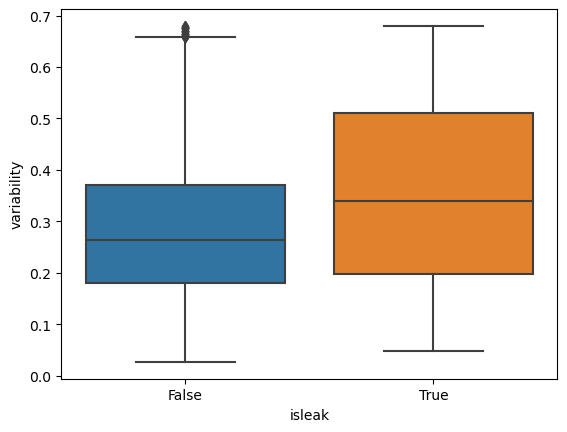

In [138]:
import seaborn as sns
sns.boxplot(data=df, x='isleak', y='variability')

<Axes: xlabel='isleak', ylabel='duration'>

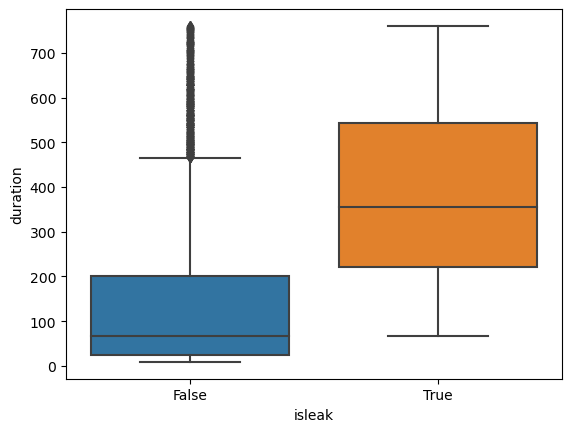

In [51]:
import seaborn as sns
sns.boxplot(data=df, x='isleak', y='duration')

<Axes: xlabel='isleak', ylabel='flow_rate'>

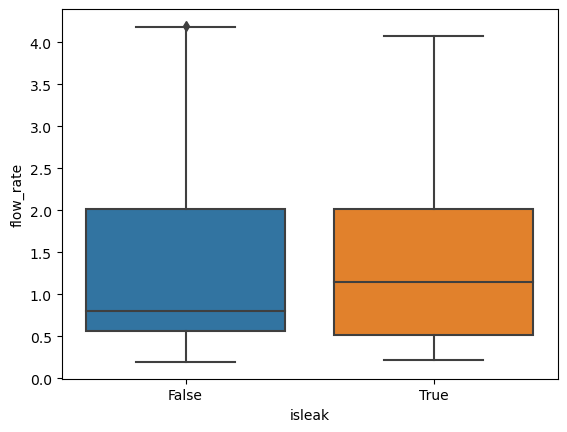

In [52]:
import seaborn as sns
sns.boxplot(data=df, x='isleak', y='flow_rate')

<Axes: xlabel='isleak', ylabel='total_flow'>

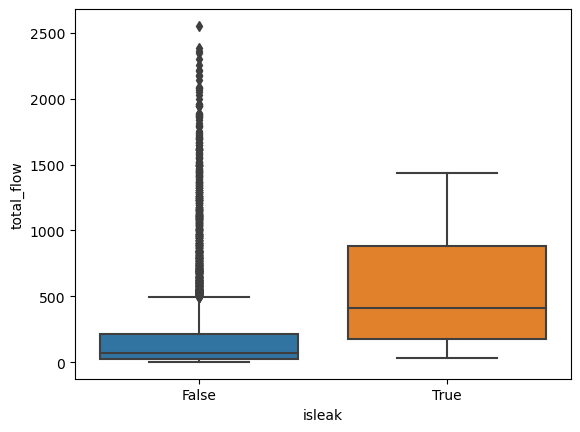

In [149]:
df['total_flow'] = df['duration'] * df['flow_rate']
sns.boxplot(data = df, x='isleak', y = 'total_flow')

<Axes: xlabel='isleak', ylabel='flow_per_variability'>

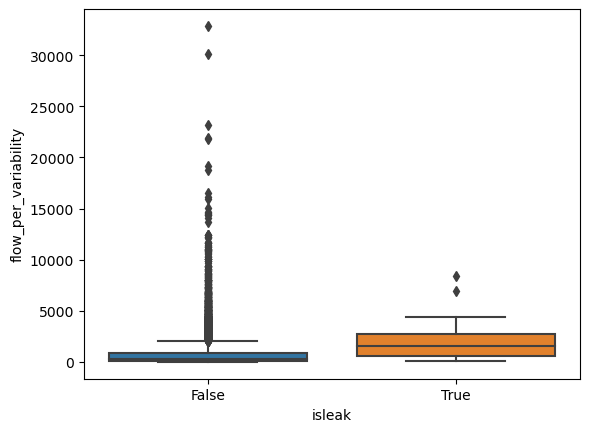

In [150]:
df['flow_per_variability'] = df['total_flow'] / (df['variability'] + 1e-5)
sns.boxplot(data=df, x='isleak', y='flow_per_variability')


<Axes: xlabel='isleak', ylabel='duration_variability_ratio'>

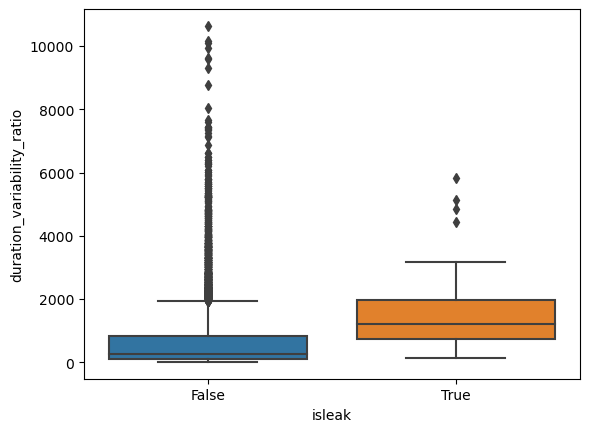

In [151]:
df['duration_variability_ratio'] = df['duration'] / (df['variability'] + 1e-5)
sns.boxplot(data=df, x='isleak', y='duration_variability_ratio')

In [152]:
df['hour'] = pd.to_datetime(df['time']).dt.hour
df['minute'] = pd.to_datetime(df['time']).dt.minute
df['seconds'] = pd.to_datetime(df['time']).dt.second

df = df.drop(columns=['time'])

In [153]:
#df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,day,duration,flow_rate,variability,isleak,total_flow,flow_per_variability,duration_variability_ratio,hour,minute,seconds
0,Sun,10,2.005437,0.445410,False,20.054368,45.023532,22.450736,0,31,37
1,Sat,141,2.244325,0.097051,False,316.449891,3260.330988,1452.699726,19,20,8
2,Thu,22,1.447766,0.328988,False,31.850842,96.811698,66.869735,19,24,42
3,Sat,45,1.796816,0.670781,False,80.856712,120.539439,67.085027,15,20,20
4,Mon,37,0.372023,0.347357,False,13.764847,39.626242,106.515603,21,47,19


In [154]:
numerical_features = ['duration', 'flow_rate', 'variability', 'flow_per_variability', 'duration_variability_ratio']
categorical_features = ['day']

In [155]:
# Preprocessor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
one_hencoder = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [156]:
X = df.drop(columns=['isleak'])
y = df['isleak']

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((6939, 10), (1735, 10))

In [158]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [159]:
X_train

array([[-0.76690103,  0.68464712, -0.65526288, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.37569203, -0.7448784 , -1.21769619, ...,  1.        ,
         0.        ,  0.        ],
       [-0.04565017,  2.84714704, -0.06220952, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.71538312, -1.03609615, -0.38727496, ...,  1.        ,
         0.        ,  0.        ],
       [-0.58372621,  0.82032728, -0.56284471, ...,  0.        ,
         0.        ,  0.        ],
       [-0.70393469, -0.72021347,  0.90537611, ...,  0.        ,
         1.        ,  0.        ]])

In [160]:
y_train.value_counts()

False    6886
True       53
Name: isleak, dtype: int64

In [161]:
from sklearn.svm import OneClassSVM
model = SMOTEBoost()
model.fit(X_train, y_train)

ImportError: cannot import name 'SMOTEBoost' from 'sklearn.ensemble' (/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/__init__.py)

In [ ]:
## instead of general oversampling, i want to apply smote based oversampling



In [75]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

## perform over sampling

ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# # Perform random sampling
# rus = RandomUnderSampler(random_state=0)
# X_train_rus, y_train_rus = rus.fit_resample(X_train_ros, y_train_ros)


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(class_weight='balanced')
model.fit(X_train_ros, y_train_ros)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1373  349]
 [   4    9]]
              precision    recall  f1-score   support

       False       1.00      0.80      0.89      1722
        True       0.03      0.69      0.05        13

    accuracy                           0.80      1735
   macro avg       0.51      0.74      0.47      1735
weighted avg       0.99      0.80      0.88      1735



In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_ros, y_train_ros)
y_pred_rf = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[1719    3]
 [  13    0]]
              precision    recall  f1-score   support

       False       0.99      1.00      1.00      1722
        True       0.00      0.00      0.00        13

    accuracy                           0.99      1735
   macro avg       0.50      0.50      0.50      1735
weighted avg       0.99      0.99      0.99      1735



In [82]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_sm, y_sm)
y_pred = rf.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1706   16]
 [  13    0]]
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      1722
        True       0.00      0.00      0.00        13

    accuracy                           0.98      1735
   macro avg       0.50      0.50      0.50      1735
weighted avg       0.99      0.98      0.98      1735



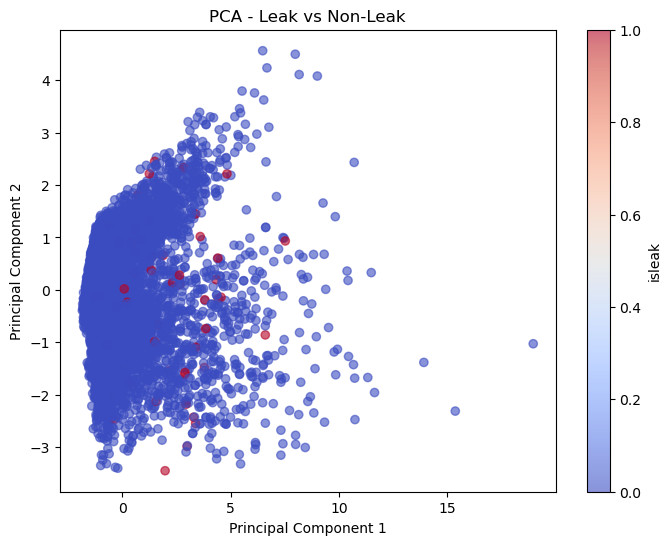

In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.6)
plt.title('PCA - Leak vs Non-Leak')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='isleak')
plt.show()


In [85]:
import pandas as pd
import numpy as np

# Convert time to datetime
df_cleaned['time'] = pd.to_datetime(df_cleaned['time'], format='%H:%M:%S', errors='coerce')

# Extract hour + minute fraction
df_cleaned['hour'] = df_cleaned['time'].dt.hour + df_cleaned['time'].dt.minute / 60.0

# Cyclical encoding of hour
df_cleaned['hour_sin'] = np.sin(2 * np.pi * df_cleaned['hour'] / 24)
df_cleaned['hour_cos'] = np.cos(2 * np.pi * df_cleaned['hour'] / 24)


In [86]:
# Map day names to numbers (Mon = 0, ..., Sun = 6)
day_map = {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}
df_cleaned['day_num'] = df_cleaned['day'].map(day_map)

# Optional: One-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=['day_num'], prefix='day')


In [87]:
# Example interactions
df_cleaned['flow_x_duration'] = df_cleaned['flow_rate'] * df_cleaned['duration']
df_cleaned['flow_div_variability'] = df_cleaned['flow_rate'] / (df_cleaned['variability'] + 1e-5)  # avoid division by zero


In [89]:
# Drop unused columns
df_model = df_cleaned.drop(columns=['time', 'day', 'hour'])  # drop raw time/day

# Check feature columns
features = df_model.drop(columns='isleak')
target = df_model['isleak']


In [90]:
df_model.head()


,duration,flow_rate,variability,isleak,total_flow,flow_per_variability,duration_variability_ratio,minute,seconds,hour_sin,hour_cos,day_0,day_1,day_2,day_3,day_4,day_5,day_6,flow_x_duration,flow_div_variability
0,10,2.005437,0.445410,False,20.054368,45.023532,22.450736,31,37,0.134851,0.990866,0,0,0,0,0,0,1,20.054368,4.502353
1,141,2.244325,0.097051,False,316.449891,3260.330988,1452.699726,20,8,-0.939693,0.342020,0,0,0,0,0,1,0,316.449891,23.122915
2,22,1.447766,0.328988,False,31.850842,96.811698,66.869735,24,42,-0.933580,0.358368,0,0,0,1,0,0,0,31.850842,4.400532
3,45,1.796816,0.670781,False,80.856712,120.539439,67.085027,20,20,-0.766044,-0.642788,0,0,0,0,0,1,0,80.856712,2.678654
4,37,0.372023,0.347357,False,13.764847,39.626242,106.515603,47,19,-0.548293,0.836286,1,0,0,0,0,0,0,13.764847,1.070980


In [91]:
X = df_model.drop(columns=['isleak'])
y = df_model['isleak']

In [118]:
numerical_features = list(X.columns)
categorical_features =[]


In [119]:
# Preprocessor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
one_hencoder = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((6939, 19), (1735, 19))

In [130]:
X_train

,duration,flow_rate,variability,total_flow,flow_per_variability,duration_variability_ratio,minute,seconds,hour_sin,hour_cos,day_0,day_1,day_2,day_3,day_4,day_5,day_6,flow_x_duration,flow_div_variability
1175,13,1.922586,0.195844,24.993621,127.613470,66.375940,32,47,0.992546,0.121869,0,0,0,0,0,0,1,24.993621,9.816421
4791,562,0.602019,0.120419,338.334767,2809.420886,4666.663583,9,23,0.039260,0.999229,0,0,0,1,0,0,0,338.334767,4.998970
4510,139,3.920260,0.275376,544.916201,1978.736960,504.746302,37,34,0.774393,-0.632705,0,0,0,0,1,0,0,544.916201,14.235518
3151,46,1.481253,0.383044,68.137637,177.880109,120.087597,36,36,0.156434,0.987688,0,0,0,0,0,0,1,68.137637,3.866959
8628,104,0.996617,0.396090,103.648161,261.671671,262.559930,15,16,0.659346,-0.751840,0,0,0,0,0,0,1,103.648161,2.516074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9468,48,0.700552,0.440185,33.626484,76.389985,109.042600,59,5,0.503774,-0.863836,0,0,0,0,1,0,0,33.626484,1.591458
37,37,2.449466,0.258104,90.630229,351.125197,143.347671,42,21,-0.902585,0.430511,0,0,1,0,0,0,0,90.630229,9.489870
1325,22,0.332998,0.231783,7.325957,31.605629,94.912361,1,27,-0.503774,-0.863836,0,0,0,1,0,0,0,7.325957,1.436619
1243,45,2.047925,0.208238,92.156619,442.533260,216.088620,56,21,-0.874620,0.484810,0,0,0,0,0,0,1,92.156619,9.834072


In [131]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts().to_dict())

AttributeError: 'NoneType' object has no attribute 'split'

In [122]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [125]:
import numpy as np

# Check if the array contains only numeric values
print("X_train type:", type(X_train))
print("X_train dtype:", X_train.dtype)

# Check for NaNs or infinite values
print("Any NaNs?", np.isnan(X_train).any())
print("Any Infs?", np.isinf(X_train).any())


X_train type: <class 'numpy.ndarray'>
X_train dtype: float64
Any NaNs? False
Any Infs? False


In [127]:
# Let's say original column names were stored in `X.columns` before conversion
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Now you can do:
X_train_df = X_train_df.apply(pd.to_numeric, errors='coerce')


In [128]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts().to_dict())

AttributeError: 'NoneType' object has no attribute 'split'

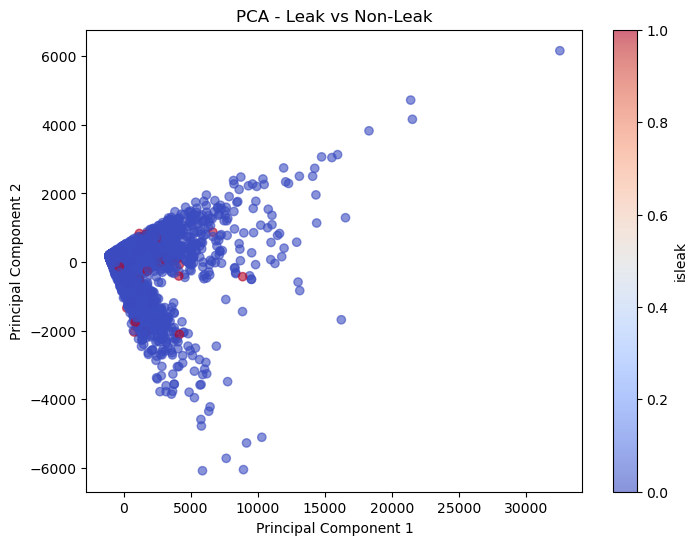

In [93]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.6)
plt.title('PCA - Leak vs Non-Leak')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='isleak')
plt.show()


In [95]:
y_train.value_counts()

False    6886
True       53
Name: isleak, dtype: int64

In [74]:
y_train_rus.value_counts()

False    53
True     53
Name: isleak, dtype: int64

In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
models = {
    "logistic_regresio" : LogisticRegression(),
    "Random Forest" : RandomForestClassifier(n_estimators= 100, class_weight= "balanced",min_samples_split= 15, max_features= 5, max_depth= 8),
    "Ada Boost" : AdaBoostClassifier(n_estimators= 50, algorithm ='SAMME.R', learning_rate=0.1),
    "Gradient Boosting" : GradientBoostingClassifier(subsample= 0.8, n_estimators = 300, max_depth = 3 , learning_rate=0.01),
    "XGBoost" : XGBClassifier(subsample = 0.8, n_estimators = 100, max_depth = 5,learning_rate = 0.2, colsample_bytree = 1.0)
}

In [31]:
from sklearn.metrics import recall_score, f1_score,roc_auc_score, accuracy_score, confusion_matrix

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_confusion = confusion_matrix(y_train, y_train_pred)
    model_train_auc_roc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

    # Test set performance 
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    model_test_confusion = confusion_matrix(y_test, y_test_pred)

    print(list(models.values())[i])
    print("-------------------------------")
    print("Model Performance for train set")
    print("model train accuracy", model_train_accuracy)
    print("Model recall on train set", model_train_recall)
    print("model f1 score on train set", model_train_f1)
    print("model train auc roc", model_train_auc_roc)
    print("model train confusing matrix", model_train_confusion)
    
    print("--------------------------")
    print("Model performance on Test set")
    print("model test set accuracy", model_test_accuracy)
    print("Test set recall", model_test_recall)
    print("Test set f1", model_test_f1)
    print("Test set auc roc", model_test_auc_roc)
    print("Test set confusion matrix", model_test_confusion)

LogisticRegression()
-------------------------------
Model Performance for train set
model train accuracy 0.98875
Model recall on train set 0.01098901098901099
model f1 score on train set 0.02173913043478261
model train auc roc 0.8070288543167541
model train confusing matrix [[7909    0]
 [  90    1]]
--------------------------
Model performance on Test set
model test set accuracy 0.9885
Test set recall 0.0
Test set f1 0.0
Test set auc roc 0.7700732334894768
Test set confusion matrix [[1977    0]
 [  23    0]]
RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=5,
                       min_samples_split=15)
-------------------------------
Model Performance for train set
model train accuracy 0.964625
Model recall on train set 0.978021978021978
model f1 score on train set 0.386117136659436
model train auc roc 0.9918857220665287
model train confusing matrix [[7628  281]
 [   2   89]]
--------------------------
Model performance on Test set
model test set accuracy 0.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Scale the dataset on both train and test sets.
# Note that we fit MinMaxScaler on X_train only, not on the entire dataset.
# This prevents data leakage from test set to train set.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Perform PCA Decomposition on both train and test sets
# Note that we fit PCA on X_train only, not on the entire dataset.
# This prevents data leakage from test set to train set.
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Function for plotting dataset 
def plot_data(X,y,ax,title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)

# Plot dataset
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_pca, y_train, ax, title='Original Dataset')

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
model = SVC(gamma='scale')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train_rus, y_train_rus, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % scores.mean())

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Perform random oversampling
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train_pca, y_train)

In [ ]:
from sklearn.svm import SVC

# Train SVC on original data
clf = SVC(kernel='linear',probability=True)
clf.fit(X_train, y_train)

# Train SVC on randomly oversampled data
clf_ros = SVC(kernel='linear',probability=True)
clf_ros.fit(X_train_ros, y_train_ros)

# Train SVC on randomly undersampled data
clf_rus = SVC(kernel='linear',probability=True)
clf_rus.fit(X_train_rus, y_train_rus)

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt

# Helper function for plotting ROC
def plot_roc(ax, X_train, y_train, X_test, y_test, title):
    clf = SVC(kernel='linear',probability=True)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresh = metrics.roc_curve(y_test, y_test_pred)
    #print("confusion metrics", metrics.confusion_matrix(y_test, y_test_pred))
    #print("f1 score", metrics.f1_score(y_test, y_test_pred))
    auc = metrics.roc_auc_score(y_test, y_test_pred)
    ax.plot(fpr,tpr,label=f"{title} AUC={auc:.3f}")

    ax.set_title('ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc=0)

# Plot all ROC into one graph
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train_pca, y_train, X_test_pca, y_test, 'Original Dataset')
plot_roc(ax, X_train_ros, y_train_ros, X_test_pca, y_test, 'Randomly Oversampled Dataset')
plot_roc(ax, X_train_rus, y_train_rus, X_test_pca, y_test, 'Randomly Undersampled Dataset')


In [ ]:
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_ros, y_train_ros, ax, title='Original Dataset')

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title("PCA - 2D View of Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [ ]:
from sklearn.svm import SVC

# Train SVC on original data
clf = SVC(kernel='rbf',probability=True)
clf.fit(X_train, y_train)

# Train SVC on randomly oversampled data
clf_ros = SVC(kernel='rbf',probability=True)
clf_ros.fit(X_train_ros, y_train_ros)

# Train SVC on randomly undersampled data
clf_rus = SVC(kernel='rbf',probability=True)
clf_rus.fit(X_train_rus, y_train_rus)